<div style="margin-bottom:-35px;">
    <font color=#FFFFFF markdown="1">
        <h1> <center> Gebaseerd op een cursus van:</center> </h1> 
    </font>
    <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>
</div>

# Toepassing: YOLO-model uitbreiden

## 1. Algemene info

### 1.1 Modules installeren

Voer onderstaande code-cel uit. Deze bevat de modules noodzakelijk voor deze notebook. Dit is een eenmalige actie.

<div style="background-color:#8B0000"> 
Controleert eerst dat deze notebook gebruik maakt van een venv. Vraag indien nodig aan de leerkracht om dit te controleren.</div>

In [1]:
# installeren van module opencv
%pip install opencv-python
# installeren van module matplotlib
%pip install matplotlib

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
  Using cached numpy-1.26.4-cp310-cp310-win_amd64.whl (15.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached matplotlib-3.8.4-cp310-cp310-win_amd64.whl (7.7 MB)
  Using cached pillow-10.3.0-cp310-cp310-win_amd64.whl (2.5 MB)
  Using cached kiwisolver-1.4.5-cp310-cp310-win_amd64.whl (56 kB)
  Using cached contourpy-1.2.1-cp310-cp310-win_amd64.whl (187 kB)
  Using cached fonttools-4.51.0-cp310-cp310-win_amd64.whl (2.2 MB)
  Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
  Using cached pyparsing-3.1.2-py3-none-any.whl (103 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<div style="background-color:#000065"> 
Tijdens deze notebook zal je gebruik maken van twee modules. OpenCV-Python maakt het mogelijk om afbeelding/video te laden & verwerken. Via matplotlib tonen we afbeeldingen in de notebook.
</div>

### 1.2 Waarom YOLO-model uitbreiden?

<div style="background-color:#8B8000">
Er zijn twee redenen om het YOLO-model uit te breiden...
  <ul> 
    <li>Een nieuw object toevoegen om te detecteren.</li> 
    <li>De detectie-accuraatheid van een bestaand object verhogen voor jouw situatie.</li>
  </ul>
</div>

Een eigen dataset opstellen kan door zelf veel verschillende foto's te nemen... Maar honderden (laat staan duizenden) foto's zelf maken is veel werk. Je kan ook een kleiner aantal foto's maken en deze manipuleren.  Door de afbeelding te transformeren, bijvoorbeeld door uitrekking, bijsnijden of het gebruik van een filter, ontstaan er heel wat nieuwe inputafbeeldingen. Onderzoek heeft aangetoond dat deze vervormde afbeeldingen net zo nuttig zijn voor het trainen als echte afbeelding. Onderstaand diagram toont dit proces. In deze notebook verdiep je je in deze materie. <br><br>
<figure>
  <img src="../_afbeeldingen/filters.jpg" alt="Trulli" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:50%"/>
    <br>
</figure>


## 2. Afbeeldingen manipuleren

### 2.1 Modules importeren & functies/variabelen klaarzetten 

Importeer de modules `cv2` & `matplotlib`.

In [2]:
import cv2
from matplotlib import pyplot as plt

Tenslotte Voer je onderstaande cel uit om de functie `plt_imshow` aan te maken. Deze functie toont de (verwerkte) afbeelding met `matplotlib`.
<div style="background-color:#8B8000"> 
Merk op dat deze functie reeds gebruikt is in notebook <b>1_vormdetectie.ipynb</b>.
</div>

In [3]:
# Functie om afbeelding weer te geven.
def plt_imshow(titel, afbeelding):
    plt.imshow(afbeelding, cmap='Greys_r')
    plt.title(titel)
    plt.grid(False)
    plt.show()

We zullen tijdens deze notebook de afbeelding van een tomaat manipuleren. Voer onderstaande code-cel uit om de originele afbeelding in te laden.

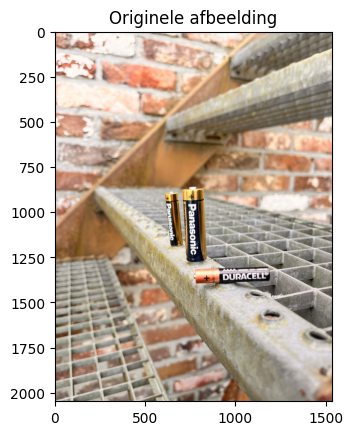

In [27]:
# Let op het pad!
foto = cv2.imread(r"batterij\afbeeldingen\batterij_Mohcine_1.jpeg")
foto = cv2.cvtColor(foto, cv2.COLOR_BGR2RGB)

plt_imshow("Originele afbeelding", foto)

### 2.2 Afbeelding roteren

Je zou misschien verwachten dat `machine learning` (en dus ook `deep learning` ) gemakkelijk twee identieke afbeeldingen kan onderscheiden. Ook al zijn ze gedraaid ten opzichte van de andere. Dit is echter niet zo! Herinner je dat een computer een afbeelding ziet als een hoop pixels. Door een foto te roteren, verandert de volgorde van de pixels. De computer ziet dus als het ware een compleet nieuwe afbeelding.

Het model moet tomaten herkennen die in alle hoeken geroteerd zijn. Dit aangezien op een transportband de tomaten in alle richtingen kunnen liggen. Het is mogelijk om een hoop foto's te nemen van een tomaat onder verschillende hoeken. Via cv2 is dit echter heel wat makkelijker.

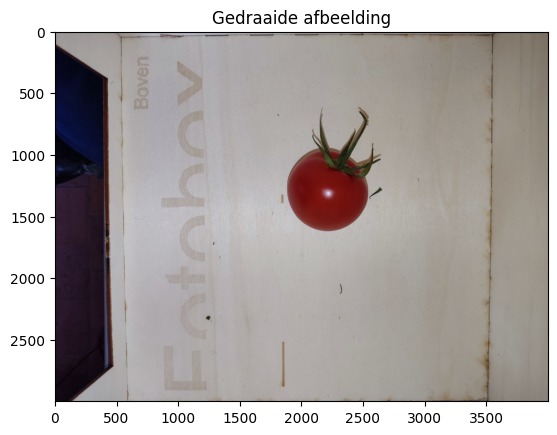

In [5]:
tomaat_rot = cv2.rotate(tomaat, cv2.ROTATE_90_CLOCKWISE)
plt_imshow("Gedraaide afbeelding", tomaat_rot)

#### Oefen mee 2.1

Roteer de afbeelding op de volgende manieren (en toon deze afbeelding):
- 180 graden.
- 90 graden (tegen de klok in).

<div style="background-color:#8B0000"> 
Overschrijf de variabele <b>tomaat</b> NIET. Je hebt deze nog nodig voor volgende oefen mee. Maak bijvoorbeeld een variabele <b>tomaat_rot180</b> aan.
</div>

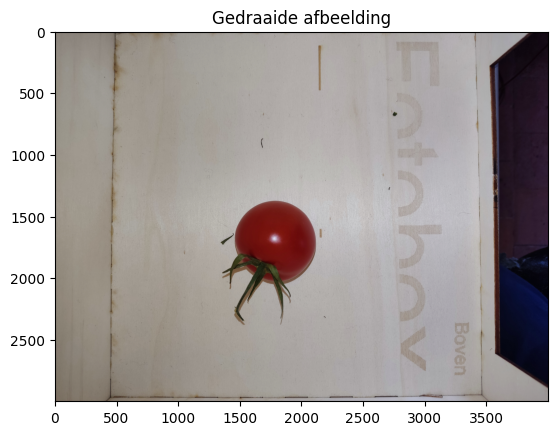

In [10]:
# Roteer tomaat 180° & tegen de klok in 90°.
tomaat_rot = cv2.rotate(tomaat_rot, cv2.ROTATE_90_COUNTERCLOCKWISE)
plt_imshow("Gedraaide afbeelding", tomaat_rot)

### 2.3 Afbeelding spiegelen

Net zoals geroteerde foto's door `deep learning` niet herkend worden. Zal het spiegelen van foto's ook een **"compleet nieuwe"** beeld geven voor het algoritme.

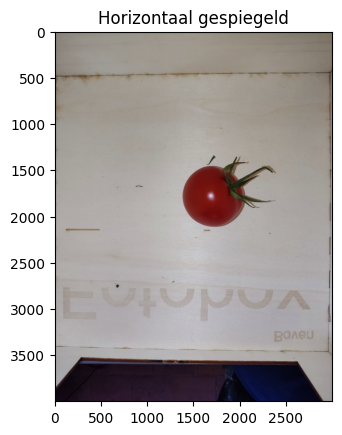

In [11]:
# 1 = horizontaal spiegelen
flippedtomaat = cv2.flip(tomaat, 1)
plt_imshow("Horizontaal gespiegeld", flippedtomaat)

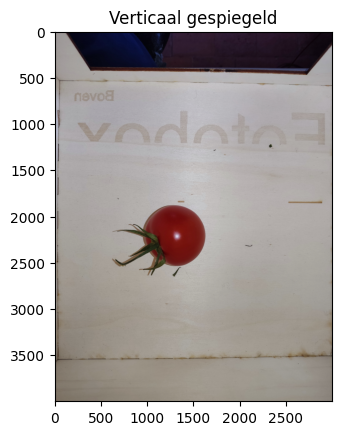

In [12]:
# 0 = verticaal spiegelen
flippedtomaat2 = cv2.flip(tomaat, 0)
plt_imshow("Verticaal gespiegeld", flippedtomaat2)

#### Oefen mee 2.2

spiegel de foto zowel horizontaal als verticaal (en toon deze afbeelding).
<div style="background-color:#8B0000"> 
Overschrijf de variabele <b>tomaat</b> NIET. Je hebt deze nog nodig voor volgende oefen mee. Maak bijvoorbeeld een variabele <b>tomaat_flipped</b> aan.
</div>

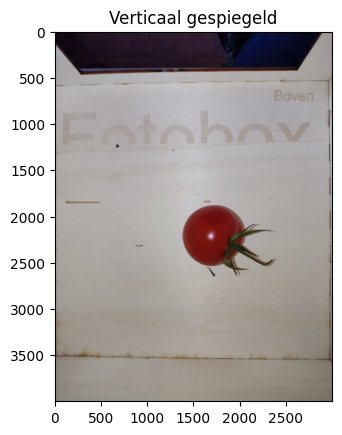

In [13]:
# Spiegel verticaal en horizontaal (zoek zelf op hoe OF denk logisch na).
# 0 = verticaal spiegelen
flippedtomaat2 = cv2.flip(tomaat, -1)
plt_imshow("Verticaal gespiegeld", flippedtomaat2)

### 2.4 Afbeelding bijsnijden

Ook het bijsnijden van de afbeelding heeft een effect. Zo leert het model dat de afbeelding niet altijd mooi in het midden ligt of volledig zichtbaar moet zijn. Bijvoorbeeld wanneer de tomaten nog maar net op de transportband liggen.

In [ ]:
# Bijsnijden van afbeelding
# neemt foto van y tot y+h en x tot x+w
y = 0
x = 0
h = 3000
w = 2000
tomaat_crop = tomaat[y:y+h, x:x+w]
plt_imshow("Bijgesneden afbeelding", tomaat_crop)

#### Oefen mee 2.3
- Bijsnijden kan ook negatieve gevolgen hebben voor de training van het model.  <div style="background-color:#008000">
    - Hoe komt dit?
</div>

- Schrijf een stukje code dat dit probleem uitlegt met behulp van de foto *tomaat*: 

<div style="background-color:#8B0000"> 
Overschrijf de variabele <b>tomaat</b> NIET. Je hebt deze nog nodig voor volgende oefen mee. Maak bijvoorbeeld een variabele <b>tomaat_crop</b> aan.
</div>

In [ ]:
# Programmeer voorbeeld van probleem met bijsnijden

### 2.5 Filters

Naast deze basis-aanpassingen kan je ook filters aanbrengen. Dit is net hetzelfde als bij Instagram: een foto kan er heel anders uitzien met een andere filter. Er zijn standaard filters beschikbaar in `cv2`. Maar je kan ook je eigen opstellen (zie **Filter 4**).

In [ ]:
# Zet foto om naar HSV-domein, blijf wel RGB-waarden gebruiken.
tomaat_filter1 = cv2.cvtColor(tomaat, cv2.COLOR_RGB2HSV)  
# Zet foto om naar grijs-domein, op basis van gemiddelde RGB-waarde.
tomaat_filter2 = cv2.cvtColor(tomaat, cv2.COLOR_RGB2GRAY)
# Zet foto om naar LAB-domein, blijf wel RGB-waarden gebruiken.   
tomaat_filter3 = cv2.cvtColor(tomaat, cv2.COLOR_RGB2LAB)
plt_imshow("Filter 1", tomaat_filter1) 
plt_imshow("Filter 2", tomaat_filter2)
plt_imshow("Filter 3", tomaat_filter3)

r, g, b = cv2.split(tomaat)
tomaat_filter4 = cv2.merge([g, r, b]) # Wissel de rood en groen waarden van de foto om.
plt_imshow("Filter 4", tomaat_filter4)

#### Oefen mee 2.4

- Waarom zou het gebruik van filters interessant kunnen zijn bij de trainingsset van het algoritme? <div style="background-color:#008000">
    - Antwoord: 
</div>

- Zorg ervoor dat de tomaat een blauwe filter krijgt (en toon deze afbeelding).

<div style="background-color:#8B0000"> 
Overschrijf de variabele <b>tomaat</b> NIET. Je hebt deze nog nodig voor volgende oefen mee. Maak bijvoorbeeld een variabele <b>tomaat_blue</b> aan.
</div>

In [ ]:
# Voeg een filter toe zodat de tomaat er blauw uitziet (in plaats van rood).

### 2.6 Afbeelding wazig maken (speciale filter)

Om ervoor te zorgen dat het algoritme ook in niet ideale omstandigheden werkt, kan je een filter toepassen die de afbeelding wazig maakt. Zo zorg je ervoor dat een object ook gedetecteerd wordt als het beeld niet optimaal is. Er zijn verschillende redenen waarom dit handig is.

 - De tomaten bewegen over de transportband. Deze beweging kan tot wazige beelden leiden.
 - Ook als de transportband in een andere ruimte wordt geplaatst waar de lichtinval een beetje anders is, moet het algoritme zijn werk kunnen doen. 
 
`cv2` bezit een aantal manieren om afbeeldingen wazig te maken (dit zijn eigenlijk ook een soort filters). De meest eenvoudige is **blur**. 

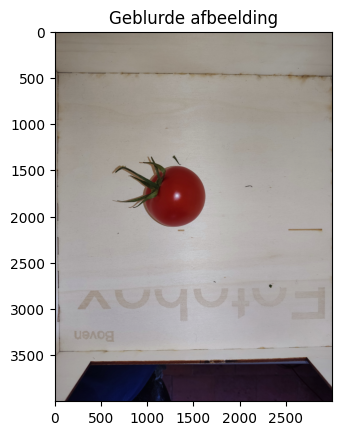

In [19]:
# Maak afbeelding wazig (tweede argument bepaald hoe wazig).
tomaten_wazig = cv2.blur(tomaat, (1,1))
plt_imshow("Geblurde afbeelding", tomaten_wazig)

#### Oefen mee 2.5

- Wijzig het tweede argument in bovenstaande code. Hoe verandert de filter bij... <div style="background-color:#008000">
    - (0,0):
    - (200,200):
    - (200,0):
    - (0,200):
</div>

## 3. Afbeeldingen overlopen

In dit deel bekijken we hoe automatisch alle afbeeldingen in een folder te overlopen & opslaan. Dit zodat we een script kunnen opstellen om de gemaakte 10 foto's eenvoudig te manipuleren.

### 3.1 Modules inladen

Importeer de modules `cv2` & `os`.

In [14]:
import cv2
import os

### 3.2 Afbeelding opslaan

Na een afbeelding te manipuleren, willen we deze natuurlijk ook opslaan (hoe kunnen we anders het model ermee trainen). Dit kan via de `cv2` functie `imwrite`.

In [20]:
# Inlezen afbeelding
tomaat = cv2.imread(r"../_afbeeldingen/tomaat.jpg")

# Roteren afbeelding
tomaat_rot = cv2.rotate(tomaat, cv2.ROTATE_180)

# Opslaan van geroteerde afbeelding in tomaat_rot180.jpg (Geef een unieke filename!)
cv2.imwrite(filename='tomaat_rot180.jpg', img=tomaat_rot)

True

De foto **tomaat_rot180.jpg** is nu aangemaakt op de locatie van de notebook. Je kan het pad (van de parameter **filename**) echter uitbreiden om deze op een andere locatie te zetten. Dit werkt hetzelfde als CSV- en JSON-bestanden. 

#### Oefen mee 3.1


- Vul onderstaand code-blok aan. Sla en gemanipuleerde versie van `tomaat.jpg` op in de map `YOLOdataset`.

In [21]:
# Inlezen afbeelding
tomaat = cv2.imread(r"../_afbeeldingen/tomaat.jpg")

# Sla een gemanipuleerde versie van tomaat.jpg op in submap _YOLOdataset.



### 3.3 Alle afbeeldingen in een folder overlopen

We willen liefst alle bestanden in een keer manipuleren en opslaan. Alle afbeeldingen uit een folder halen kan als volgt.

In [28]:
# Inladen alle bestanden in deze folder.
folder_pad    = r"../_afbeeldingen"
folder_inhoud = os.listdir(folder_pad) 

# Overloop alle afbeeldingen in folder.
teller = 0
for index, bestand in enumerate(folder_inhoud):
    if (".png" in bestand) or (".jpg" in bestand): # We werken enkel met png- of jpg-bestanden.
        teller = teller + 1
        print(f"Bestand {teller}: {bestand}")

Bestand 1: AI_sentiment.png
Bestand 2: auto.jpg
Bestand 3: bannerugentdwengo.png
Bestand 4: beeldcomputer.jpg
Bestand 5: celtoevoegen.jpg
Bestand 6: chiwawa_test.png
Bestand 7: corgibrood.png
Bestand 8: driehoek.jpg
Bestand 9: droidcam.jpg
Bestand 10: fietsen.png
Bestand 11: filters.jpg
Bestand 12: hondcake.png
Bestand 13: hondkat.png
Bestand 14: hondkatoranje.png
Bestand 15: hondkip.jpg
Bestand 16: hondmop.jpg
Bestand 17: hondmuffin.jpg
Bestand 18: interpreter.jpg
Bestand 19: kat.jpg
Bestand 20: katten.png
Bestand 21: kernel.png
Bestand 22: knipcopypaste.jpg
Bestand 23: lexicon.png
Bestand 24: lexicon_opbouw.png
Bestand 25: meerderehonden.png
Bestand 26: ML_sentiment.png
Bestand 27: objectdetectie_oefenmee2.3.png
Bestand 28: objectdetectie_oefenmee2.4.png
Bestand 29: objectdetectie_oefenmee3.2.png
Bestand 30: objectdetectie_oefenmee4.1.png
Bestand 31: park_picnic.jpg
Bestand 32: run.jpg
Bestand 33: schaal.png
Bestand 34: sentiment.png
Bestand 35: slotchocoladekoek.jpg
Bestand 36: toma

#### Oefen mee 3.2

- Overloop in bovesntaande cel alle afbeeldingen in de map `YOLOdataset`.

### 3.4 Alle afbeeldingen in een folder verwerken/opslaan

De volgende stap is natuurlijk om iedere afbeelding in de map te verwerken...

#### Oefen mee 3.3

Vertrek van onderstaande code.

- Overloop iedere afbeelding in `YOLOdataset` door gebruik te maken van <b>os.listdir</b>.
    1. Roteer iedere afbeelding 270° (90° tegen de klok in) en sla op als *naam_rot_extensie*.
    2. Spiegel iedere afbeelding verticaal en sla op als *naam_flip_extensie*.
    3. Filter iedere afbeelding met blur en sla op als *naam_blur_extensie*.

- Als voorbeeld voor test_afb_1.png. Na het uitvoeren van de code moeten volgende bestanden ook in `YOLOdataset` staan.
    - *test_afb1_rot_.png*
    - *test_afb1_flip_.png*
    - *test_afb1_blur_.png*

In [34]:
# Inladen alle bestanden in deze folder.
folder_pad    = r"batterij/afbeeldingen"
folder_inhoud = os.listdir(folder_pad) 

# Overloop alle afbeeldingen in folder.
for index, bestand in enumerate(folder_inhoud):
    if (".png" in bestand) or (".jpeg" in bestand): # We werken enkel met png- of jpg-bestanden.
        
        # Inladen afbeelding
        bestand_pad    = f"{folder_pad}/{bestand}"
        naam, extensie = os.path.splitext(bestand)
        afbeelding     = cv2.imread(bestand_pad) 

        # Roteer afbeelding + opslaan.
        foto_rot = cv2.rotate(afbeelding, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(filename=f'{folder_pad}/verwerkt/{naam}_geroteerd.{extensie}', img=foto_rot)

        
        # Spiegel afbeelding + opslaan.
        flippedfoto2 = cv2.flip(afbeelding, -1)
        cv2.imwrite(filename=f'{folder_pad}/verwerkt/{naam}_flipped.{extensie}', img=flippedfoto2)

        # Filter afbeelding (liefst wazig maken) + opslaan.
        foto_wazig = cv2.blur(afbeelding, (75,75))
        cv2.imwrite(filename=f'{folder_pad}/verwerkt/{naam}_blur.{extensie}', img=foto_wazig)



## 4. Eigen dataset uitbreiden

Vooraleer verder te gaan. Voer volgende stappen uit.
<ul>
    <li>Maak de map <b>YOLOdataset</b> volledig leeg.</li>
    <li>Zet alle afbeeldingen van *gekozen_object* in deze map.</li>
    <li>Wijzig de namen van alle afbeeldingen naar: *gekozen_object*_*naamleerling*_*nummer*.</li>
    <li>Maak in de map <b>YOLOdataset</b> ook een submap <b>verwerkt</b> aan.</li>
</ul>

<div style="background-color:#8B0000"> 
Vooraleer verder te gaan, vraag na of de namen van deze afbeeldingen correct zijn.
</div>

Neem de code uit `oefen mee 3.3` hier onder over. Breng volgende wijzingen aan.
- Overloop alle afbeeldingen in de map **YOLOdataset**.
- Pas aan op welke manier de foto's verwerkt worden. dit zodat niet iedereen op dezelfde wijze afbeeldingen roteert/spiegelt/filtert. Meer specifiek betekent dit...
    - Wijzig hoeveel de afbeelding roteert.
    - Wijzig hoe afbeelding spiegelt.
    - Wijzig de filter (liefst spelen met hoe wazig de afbeelding wordt gemaakt).
- Sla alle verwerkte afbeeldingen op in de submap **verwerkt**.


Controleer of de afbeeldingen in de submap **verwerkt** correct zijn gemanipuleerd. Indien dit het geval is, mag je deze naar de hoofdmap **YOLOdataset** verplaatsen. 

<div style="background-color:#8B0000"> 
Op het einde van dit deel moet je voor iedere originele afbeelding, drie verwerkte afbeeldingen hebben. Een geroteerd, een gespiegeld en een gefilterd (liefst blur). Vraag na of de bekomen afbeeldingen in orde zijn!
</div>

In [ ]:
# Plaats hier code uit oefen mee 3.3 en wijzig per instructies.

<div style="background-color:#8B8000"> 
Je bent nu klaar voor de volgende stap. Het labellen! 
</div>

#
  <a href="https://www.aiopschool.be/chatbot/"> 
        <img src="../_afbeeldingen/bannerugentdwengo.png" alt="Dwengo" style ="display: block; margin-left: auto; margin-right: auto; margin-bottom: 30px; width:20%"/>
    </a>

Deze Notebook is gebaseerd op: Notebook AI in de Landbouw, zie <a href="http://www.aiopschool.be">AI Op School</a>, van S. Pletinck , F. wyffels & N. Gesquière is in licentie gegeven volgens een <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Naamsvermelding-NietCommercieel-GelijkDelen 4.0 Internationaal-licentie</a>. 